# Ferromagnetic 2D square lattice XY model using NumPy and Numba

## Import the required libraries.

In [4]:
import numpy as np
from Metropolis_functions import Metropolis, Metropolis_v2
from Observables_functions import get_energy_per_spin_per_lattice
import matplotlib.pyplot as plt
import data_blockage_errors as error
import matplotlib.animation as animation
from IPython.display import HTML

## Initialise the required variables

In [27]:
J = 1 # coupling constant, where it must be > 0 for the system to exhibit ferromagnetism
L = 64 # dimension of the square lattice

tau = 500000 # relaxation time a.k.a equilibrating time
tau_extra = 500000
nrelax = 40 # total number of times to let the system equilibrate
nframes = 1 # total number of frames in the .gif over the whole simulation (not needed since we are not generating the animated .gif in this notebook)
# N = nrelax * tau # total number of iterations in the Metropolis algorithm
plot_at_Nth_index = np.array([0],dtype=np.int32) # (not needed since we are not generating the animated .gif in this notebook)

lattice = np.zeros((L, L))

Tc = 0.892937 * J  # http://www.lps.ens.fr/~krauth/images/7/72/Stage_Mayer_Johannes_2015.pdf in units of kB
T_init = 0.5
T_final = 1.2
TTc_array = np.linspace(T_init, T_final, nrelax)

## Observables

In [28]:
M2, E, E2, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

In [29]:
temp_m2, M2_blocked, error_M2, _, _ = error.get_error_block(obs=np.mean(M2,axis=1),T_i=0.5,T_f=1.2,size=6,tau=10)

(0.0, 1.05)

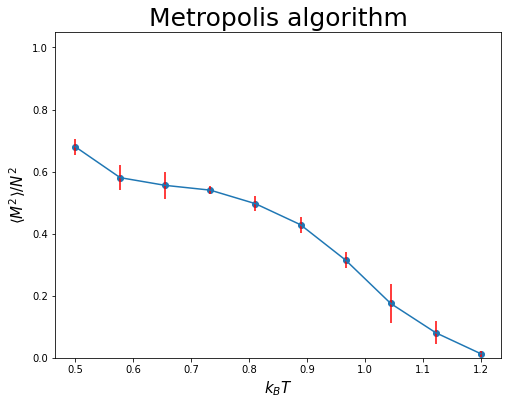

In [30]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_m2,M2_blocked)
plt.errorbar(temp_m2,M2_blocked,yerr=error_M2,ecolor='red')
plt.title(r'Metropolis algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M^2\rangle/N^2$',size=15)
plt.ylim(0,1.05)

In [36]:
cv = (np.mean(E2,axis=1)-np.mean(np.array(E),axis=1)**2)/((64**2*TTc_array**2))
temp_cv, cv_blocked, error_cv, _, _ = error.get_error_block(obs=cv,T_i=0,T_f=2,size=20,tau=10)

Text(0, 0.5, '$C_v$')

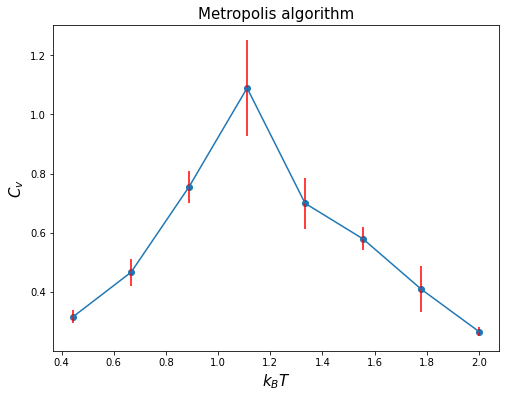

In [37]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_cv[2:],cv_blocked[2:])
plt.errorbar(temp_cv[2:],cv_blocked[2:],yerr=error_cv[2:],ecolor='red')
plt.title(r'Metropolis algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$C_v$',size=15)

In [31]:
np.column_stack((temp_m2, M2_blocked, error_M2))

array([[0.5       , 0.68081912, 0.0256017 ],
       [0.57777778, 0.58090905, 0.04095194],
       [0.65555556, 0.55607998, 0.04335207],
       [0.73333333, 0.54069394, 0.01340484],
       [0.81111111, 0.49710473, 0.02433593],
       [0.88888889, 0.4293775 , 0.02643892],
       [0.96666667, 0.31551907, 0.02681525],
       [1.04444444, 0.17585747, 0.06194356],
       [1.12222222, 0.08159082, 0.03646067],
       [1.2       , 0.01394944, 0.00895894]])

## Run calculation in different size lattices

In [6]:
L = 30 # dimension of the square lattice
lattice = np.zeros((L, L))
m_30, en_30, en2_30, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

L = 50 # dimension of the square lattice
lattice = np.zeros((L, L))
m_50, en_50, en2_50, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

L = 70 # dimension of the square lattice
lattice = np.zeros((L, L))
m_70, en_70, en2_70, _, _ = Metropolis(
    J=J,
    L=L,
    relaxation_time=tau,
    extra_time=tau_extra,
    lattice=lattice,
    T_init=T_init,
    T_final=T_final,
    T_n=nrelax,
    plot_at_Nth_index=plot_at_Nth_index,
    save_for_plot=False)

In [7]:
temp_m_30, m_30_blocked, error_m_30, tau_, error_tau = error.get_error_block(obs=np.mean(m_30,axis=1),T_i=0,T_f=2,size=10,tau=20)
temp_m_50, m_50_blocked, error_m_50, tau_, error_tau = error.get_error_block(obs=np.mean(m_50,axis=1),T_i=0,T_f=2,size=10,tau=20)
temp_m_70, m_70_blocked, error_m_70, tau_, error_tau = error.get_error_block(obs=np.mean(m_70,axis=1),T_i=0,T_f=2,size=10,tau=20)

In [8]:
ls = [30,50,70]

In [13]:
np.column_stack((temp_m_70, m_70_blocked,error_m_70))

array([[0.00000000e+00, 9.88894670e-01, 1.11051380e-02],
       [1.05263158e-01, 9.29818982e-01, 1.51039498e-02],
       [2.10526316e-01, 8.74995564e-01, 1.38604437e-02],
       [3.15789474e-01, 8.05501019e-01, 1.28958348e-02],
       [4.21052632e-01, 7.41575356e-01, 8.92265786e-03],
       [5.26315789e-01, 6.73976576e-01, 1.85125816e-02],
       [6.31578947e-01, 5.97204057e-01, 2.69298234e-02],
       [7.36842105e-01, 5.24639491e-01, 1.46489820e-02],
       [8.42105263e-01, 4.65395771e-01, 8.46558989e-04],
       [9.47368421e-01, 3.41897698e-01, 2.52709323e-03],
       [1.05263158e+00, 1.60899720e-01, 7.34929289e-02],
       [1.15789474e+00, 1.71066921e-02, 1.03102329e-02],
       [1.26315789e+00, 5.74993288e-03, 6.50453487e-04],
       [1.36842105e+00, 3.90334853e-03, 1.60984710e-03],
       [1.47368421e+00, 2.08504438e-03, 1.19227239e-03],
       [1.57894737e+00, 1.16714110e-03, 3.65653168e-04],
       [1.68421053e+00, 1.43513634e-03, 2.14544888e-04],
       [1.78947368e+00, 1.59421

(0.0, 1.05)

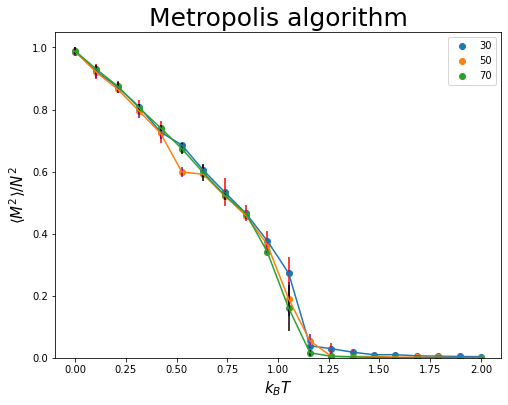

In [10]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_m_30,m_30_blocked)
plt.errorbar(temp_m_30,m_30_blocked,yerr=error_m_30,ecolor='red')
plt.scatter(temp_m_50,m_50_blocked)
plt.errorbar(temp_m_50,m_50_blocked,yerr=error_m_50,ecolor='purple')
plt.scatter(temp_m_70,m_70_blocked)
plt.errorbar(temp_m_70,m_70_blocked,yerr=error_m_70,ecolor='black')
plt.legend(ls)
plt.title(r'Metropolis algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M^2\rangle/N^2$',size=15)
plt.ylim(0,1.05)

In [68]:
cv_30 = (np.mean(en2_30,axis=1)-np.mean(np.array(en_30),axis=1)**2)/((30**2*TTc_array**2))
cv_50 = (np.mean(en2_50,axis=1)-np.mean(np.array(en_50),axis=1)**2)/((50**2*TTc_array**2))
cv_70 = (np.mean(en2_70,axis=1)-np.mean(np.array(en_70),axis=1)**2)/((70**2*TTc_array**2))

In [69]:
temp_cv_30, cv_blocked_30, error_cv_30, _, _ = error.get_error_block(obs=cv_30,T_i=0,T_f=2,size=20,tau=20)
temp_cv_50, cv_blocked_50, error_cv_50, _, _ = error.get_error_block(obs=cv_50,T_i=0,T_f=2,size=20,tau=20)
temp_cv_70, cv_blocked_70, error_cv_70, _, _ = error.get_error_block(obs=cv_70,T_i=0,T_f=2,size=20,tau=20)

Text(0, 0.5, '$C_v$')

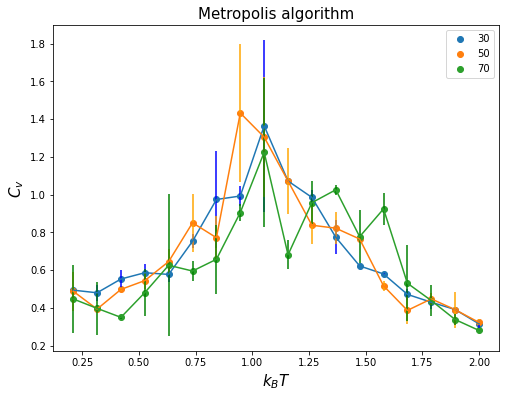

In [71]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_cv_30[2:],cv_blocked_30[2:])
plt.errorbar(temp_cv_30[2:],cv_blocked_30[2:],yerr=error_cv_30[2:],ecolor='blue')
plt.scatter(temp_cv_50[2:],cv_blocked_50[2:])
plt.errorbar(temp_cv_50[2:],cv_blocked_50[2:],yerr=error_cv_50[2:],ecolor='orange')
plt.scatter(temp_cv_70[2:],cv_blocked_70[2:])
plt.errorbar(temp_cv_70[2:],cv_blocked_70[2:],yerr=error_cv_70[2:],ecolor='green')
plt.legend(ls)
plt.title(r'Metropolis algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$C_v$',size=15)

In [72]:
sus_30 = np.nan_to_num((np.mean(m_30,axis=1)-np.mean(np.sqrt(m_30),axis=1)**2)*30**2/TTc_array)
sus_50 = np.nan_to_num((np.mean(m_50,axis=1)-np.mean(np.sqrt(m_50),axis=1)**2)*50**2/TTc_array)
sus_70 = np.nan_to_num((np.mean(m_70,axis=1)-np.mean(np.sqrt(m_70),axis=1)**2)*70**2/TTc_array)

In [75]:
temp_sus_30, sus_30_blocked, error_sus_30, _, _ = error.get_error_block(obs=sus_30,T_i=0,T_f=2,size=10,tau=20)
temp_sus_50, sus_50_blocked, error_sus_50, _, _ = error.get_error_block(obs=sus_50,T_i=0,T_f=2,size=10,tau=20)
temp_sus_70, sus_70_blocked, error_sus_70, _, _ = error.get_error_block(obs=sus_70,T_i=0,T_f=2,size=10,tau=20)

(0.0, 15.0)

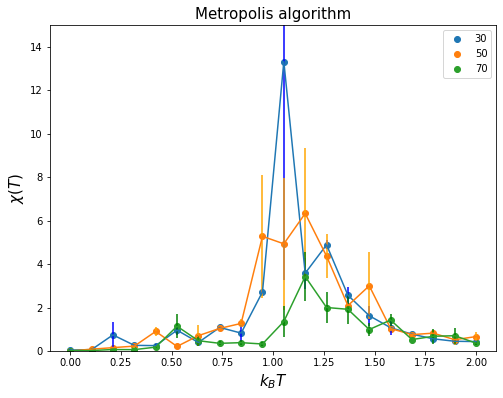

In [79]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_sus_30,sus_30_blocked)
plt.errorbar(temp_sus_30,sus_30_blocked,yerr=error_sus_30,ecolor='blue')
plt.scatter(temp_sus_50,sus_50_blocked)
plt.errorbar(temp_sus_50,sus_50_blocked,yerr=error_sus_50,ecolor='orange')
plt.scatter(temp_sus_70,sus_70_blocked)
plt.errorbar(temp_sus_70,sus_70_blocked,yerr=error_sus_70,ecolor='green')
plt.legend(ls)
plt.title(r'Metropolis algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\chi(T)$',size=15)
plt.ylim(0,15)

## Plotting the final lattice

The resulting lattice in phase space and energy space.


Text(0.5, 0.98, '$J$=1. $T$=1.79. $L$=64.')

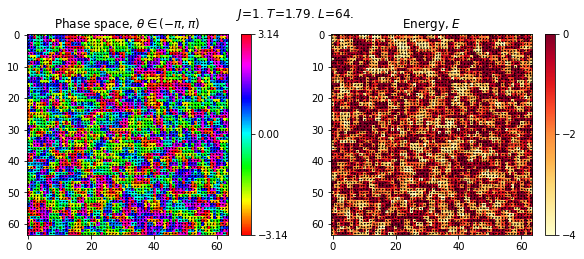

In [6]:
print("The resulting lattice in phase space and energy space.")
X, Y = np.mgrid[0:L, 0:L]
U, V = np.cos(lattice.T), np.sin(
    lattice.T)
E = get_energy_per_spin_per_lattice(
    J, lattice)
fig = plt.figure(figsize=(10, 3.7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.quiver(X,
            Y,
            U,
            V,
            edgecolor='k',
            facecolor='None',
            linewidth=.5)
im1 = ax1.imshow(lattice,
                    vmin=-np.pi,
                    vmax=np.pi,
                    cmap='hsv')
fig.colorbar(im1, ticks=[-3.14, 0, 3.14], ax=ax1)
ax1.set_title("Phase space, $θ\in(-\pi,\pi)$")

ax2.quiver(X,
            Y,
            U,
            V,
            edgecolor='k',
            facecolor='None',
            linewidth=.5)
im2 = ax2.imshow(E, vmin=-4, vmax=0, cmap='YlOrRd')
fig.colorbar(im2, ticks=[-4, -2, 0], ax=ax2)
ax2.set_title("Energy, $E$")
fig.suptitle( f"$J$={J}. $T$={np.round(T_final,2)}. $L$={L}." )

## Calculate the physical observables with the simulation results obtained

## Squared magnetisation

Its expression is given as $\frac{\left\langle M^2\right\rangle}{N^2}=\frac{1}{N^2}\left\langle\left(\sum_{i=1}^{N} \cos \theta_{i}\right)^{2}+\left(\sum_{i=1}^{N} \sin \theta_{i}\right)^{2}\right\rangle$ where $N=L\times L$.

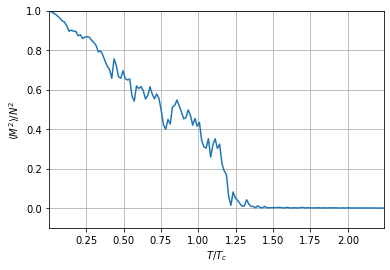

In [17]:
plt.close()
#plt.errorbar(TTc_array/Tc,M2_average, yerr=M2_errors, ecolor='red')
plt.plot(TTc_array/Tc,M2_average)
plt.xlabel("$T/T_c$")
plt.ylabel("$\langle M^2\\rangle/N^2$")
plt.ylim([-0.1,1])
plt.xlim([T_init/Tc,T_final/Tc])
plt.grid()
plt.savefig(f"simulation_images/magnetisationsquared_L{L}_tau{tau}_nrelax{nrelax}_Tinit{int(T_init/Tc)}_Tfinal{int(T_final/Tc)}.png", dpi=300, bbox_inches='tight',transparent=True)

## Specific heat

Its expression is given as $c / k_{\mathrm{B}}=\frac{\left\langle E^{2}\right\rangle-{\langle E\rangle}^{2}}{\left(k_{\mathrm{B}} T\right)^{2}}$ where $k_B$ is the Boltzmann's constant.

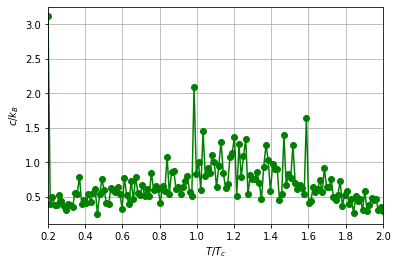

In [15]:
plt.close()
plt.plot( TTc_array/Tc ,(np.mean(E2,axis=1)-np.mean(E,axis=1)**2)/((L**2*TTc_array**2)) , 'g-o')
plt.xlabel("$T/T_c$")
plt.ylabel("$c/k_B$")
#plt.ylim([0,2])
plt.xlim([T_init/Tc,T_final/Tc])
plt.grid()
plt.savefig(f"simulation_images/specificheat_L{L}_tau{tau}_nrelax{nrelax}_Tinit{int(T_init/Tc)}_Tfinal{int(T_final/Tc)}.png", dpi=300, bbox_inches='tight',transparent=True)

In [27]:
Cv_average

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])